# Understanding the Data

In [1]:
pwd


'/home/wsuser/work'

In [2]:
#importing the required libraries
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import adam_v2
from keras.utils import np_utils


In [3]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Analyzing the data

## Understanding the Data

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

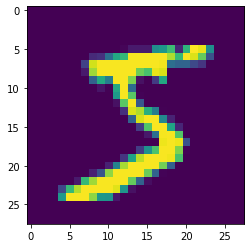

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

## Reshaping the data

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

## Apply one-Hot Encoding

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,  number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model Building

## Add CNN Layers


In [11]:
#Creating the Model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = 'softmax'))

## compiling the Model

In [12]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
number_of_classes = 10

## Train the model

In [13]:
#Fitting the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=12, batch_size=32 )

Epoch 1/12
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2558 - accuracy: 0.9495 - val_loss: 0.0911 - val_accuracy: 0.9714
Epoch 2/12
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0713 - accuracy: 0.9785 - val_loss: 0.0853 - val_accuracy: 0.9739
Epoch 3/12
1875/1875 [==============================] - 181s 97ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0892 - val_accuracy: 0.9761
Epoch 4/12
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0865 - val_accuracy: 0.9800
Epoch 5/12
1875/1875 [==============================] - 182s 97ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.1046 - val_accuracy: 0.9758
Epoch 6/12
1875/1875 [==============================] - 184s 98ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.1173 - val_accuracy: 0.9764
Epoch 7/12
1875/1875 [==============================] - 183s 98ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0


## Observing the metrics

In [14]:
metrics =model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Acurracy):")
print(metrics)

Metrics(Test loss & Test Acurracy):
[0.15601450204849243, 0.9797000288963318]


## Test the Model

## Predicting the output

In [15]:
prediction=model.predict(X_test[:4])
print(prediction)

[[2.0466719e-19 1.5009977e-26 3.1190063e-18 1.2886734e-21 3.4033370e-26
  3.5737992e-28 0.0000000e+00 1.0000000e+00 4.1938926e-20 1.5816323e-16]
 [4.7211817e-15 1.6673716e-17 1.0000000e+00 1.8564968e-21 2.2574039e-25
  3.1559607e-28 1.0899919e-15 1.0537282e-36 1.3460821e-17 9.4211894e-31]
 [5.2838785e-17 1.0000000e+00 6.0892465e-11 9.9860935e-22 2.7598831e-11
  8.5866852e-12 1.9853720e-15 3.0399098e-15 3.5663454e-08 2.4660443e-21]
 [1.0000000e+00 1.1000042e-30 5.2724016e-17 6.1741908e-29 6.6470738e-22
  1.4908284e-19 4.8832053e-08 6.2323556e-29 1.0564426e-18 1.1798048e-13]]


In [16]:

print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Save The model

In [17]:
model.save('mnistCNN.h5')

### IBM DEPLOYMENT

In [18]:
!pip install watson-machine-learning-client 

     |████████████████████████████████| 538 kB 16.8 MB/s eta 0:00:01


In [32]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"R5ep2OIuDK0SzPR6_yGxrz8qrIKR7qfZlV7L88KTrBEO"
}

client=APIClient(wml_credentials)

In [33]:
client

In [36]:
def guid_space_name(client,Digit_deploy):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==Digit_deploy)['metadata']['id'])

In [37]:
space_uid=guid_space_name(client,'Digit_deploy')
print("Space UID "+space_uid)

Space UID 0bd78937-53fe-415f-8dfc-d064c7fd214a


In [38]:
client.set.default_space(space_uid)

'SUCCESS'

In [39]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [40]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [41]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [49]:
!tar -zcvf digit-recognition.tgz mnistCNN.h5

mnistCNN.h5


In [50]:
ls

digit-recognition.tgz  mnistCNN.h5  models/


In [51]:
model_details=client.repository.store_model(model='digit-recognition.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [52]:
model_id=client.repository.get_model_id(model_details)

In [53]:
model_id

'2550f0a7-813c-409c-bfe6-e3fcb3b7e615'

In [54]:
client.repository.download(model_id,'digit.tar.gb')

Successfully saved model content to file: 'digit.tar.gb'


'/home/wsuser/work/digit.tar.gb'

In [55]:
ls

digit-recognition.tgz  digit.tar.gb  mnistCNN.h5  models/
